#**Week 2: Data Visualization in Astronomy**

Visualization is a key aspect of analyzing astronomical data, allowing us to identify patterns, distributions, and relationships. Below are some examples of the different visualization techniques used in the notebook and their significance in astronomy.

In [8]:
!pip install corner

In [9]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
from mpl_toolkits.mplot3d import Axes3D
import corner

# **Scatter Plot – Star Magnitudes vs Distance**

A scatter plot is used to examine relationships between two variables. In this case, we plot the apparent magnitude of stars against their distance in light-years.

**Why is it important in astronomy?**

* Helps visualize how brightness (magnitude) changes with distance.
* The inverse-y axis is used to since brighter objects have lower magnitudes.

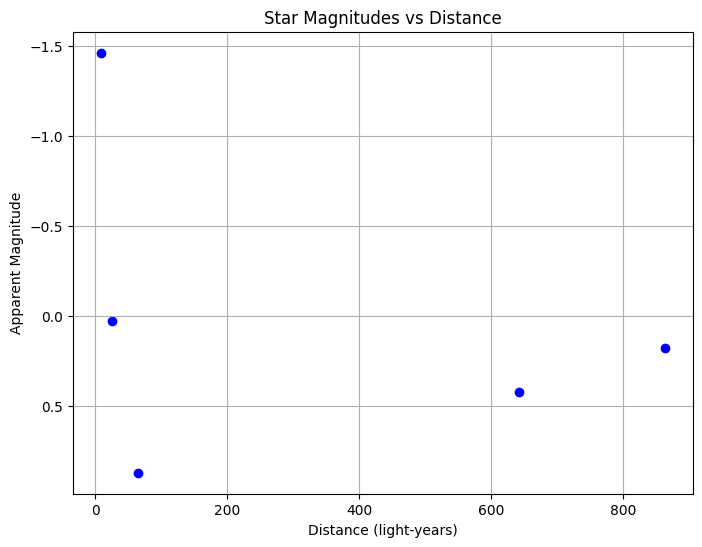

In [2]:
# Example 1: Basic Scatter Plot - Star Magnitudes vs Distance
# ------------------------------------------------------------
data = {"Star": ["Sirius", "Vega", "Betelgeuse", "Rigel", "Aldebaran"],
        "Magnitude": [-1.46, 0.03, 0.42, 0.18, 0.87],
        "Distance (ly)": [8.6, 25.0, 642.5, 863, 65.3]}

star_table = Table(data)

plt.figure(figsize=(8,6))
plt.scatter(star_table["Distance (ly)"], star_table["Magnitude"], color='blue', marker='o')
plt.gca().invert_yaxis()  # Ensures the correct astronomical convention (brighter stars appear higher).
plt.xlabel("Distance (light-years)")
plt.ylabel("Apparent Magnitude")
plt.title("Star Magnitudes vs Distance")
plt.grid()
plt.show()

# **Histogram – Distribution of Star Magnitudes**

Histograms are useful for understanding the distribution of a dataset. Here, we examine the frequency of different star magnitudes.

**Why is it important in astronomy?**

* Helps categorize stars into brightness classes.
* Can reveal whether a sample is dominated by bright or faint stars.

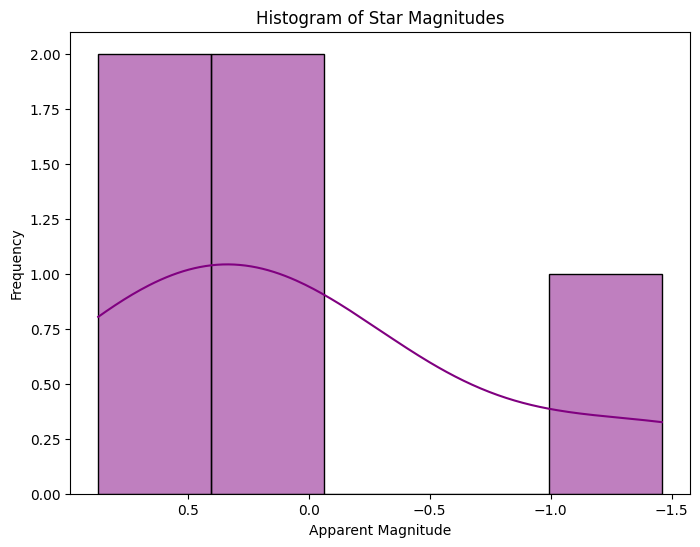

In [3]:
# Example 2: Histogram - Distribution of Star Magnitudes
# --------------------------------------------------------
plt.figure(figsize=(8,6))
sns.histplot(star_table["Magnitude"], bins=5, kde=True, color='purple') #sns.histplot() is used with the kde=True option, which overlays a smooth probability density curve.
plt.xlabel("Apparent Magnitude")
plt.ylabel("Frequency")
plt.title("Histogram of Star Magnitudes")
plt.gca().invert_xaxis() #follows the convention that brighter stars have lower magnitude values.
plt.show()

Can you think about alternative ways to plot histograms in python❓

# **Heatmap – Stellar Density Distribution**

Heatmaps help represent the density of objects in 2D space. Here, we generate random position for stars and plot their stellar density distribution.

**Why is it important in astronomy?**

* Used to visualize star clusters, galaxy distributions, or gas clouds.
* Helps in understanding how stars/gas/etc. are spatially distributed.

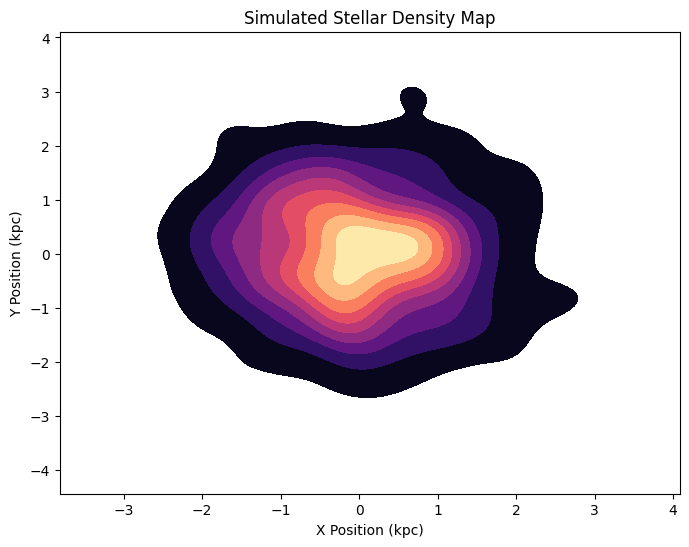

In [4]:
# Example 3: Heatmap - Stellar Density Distribution
# --------------------------------------------------
x = np.random.normal(loc=0, scale=1.0, size=500) #Random number generation using a "Normal Distribution" to generate random x, y positions of stars
y = np.random.normal(loc=0, scale=1.0, size=500)

plt.figure(figsize=(8,6))
sns.kdeplot(x=x, y=y, cmap="magma", fill=True) #sns.kdeplot() is used with cmap="magma" to create a kernel density estimate (KDE) plot, which shows regions with high stellar concentrations.
plt.xlabel("X Position (kpc)")
plt.ylabel("Y Position (kpc)")
plt.title("Simulated Stellar Density Map")
plt.show()

**Understanding the Normal Distribution**

A normal distribution is described by the probability density function (PDF):

\begin{align}
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
\end{align}

where:

* $μ$ (mean) is the center of the distribution (`loc=0` in the code).
* $σ$ (standard deviation) determines spread (`scale=1.0` in the code).
* The `size=500` parameter specifies that 500 random values are generated.

**Why Use a Normal Distribution in Astronomy?**

* Many astronomical quantities (e.g., measurement errors, velocities, stellar distributions) naturally follow a normal distribution.
* Used in statistical noise modeling for telescope data.
* ...



# **3D Visualization – Star Positions in Space**

A 3D scatter plot is used to visualize the spatial distribution of stars in three dimensions.

**Why is it important in astronomy?**

* Helps analyze the structure of star clusters, galaxies, and cosmic filaments.
* Can reveal large-scale patterns in the universe.

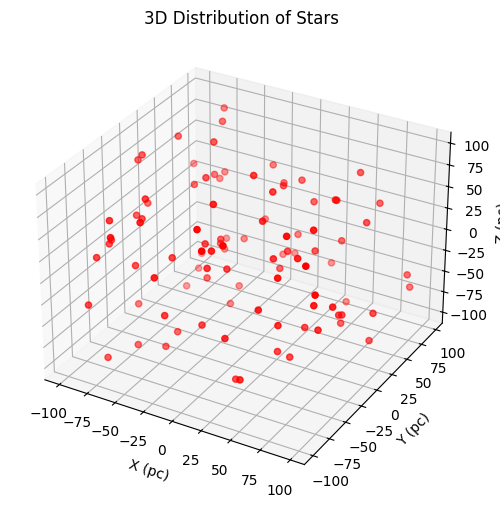

In [5]:
# Example 4: 3D Visualization - Star Positions in Space
# ------------------------------------------------------
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Generating random 3D positions for 100 stars
np.random.seed(42)
x = np.random.uniform(-100, 100, 100)
y = np.random.uniform(-100, 100, 100)
z = np.random.uniform(-100, 100, 100)

ax.scatter(x, y, z, color='red', marker='o')
ax.set_xlabel("X (pc)")
ax.set_ylabel("Y (pc)")
ax.set_zlabel("Z (pc)")
ax.set_title("3D Distribution of Stars")
plt.show()


**Differences Between `random.uniform` and `random.normal` for Generating Random Numbers**

1. Uniform Distribution (`np.random.uniform`)

* Generates random numbers where every value within a given range has an equal probability of occurring.
* Defined by two parameters: `low` (minimum) and `high` (maximum).
* Example:
```
np.random.uniform(low=0, high=10, size=5)
```
This generates 5 numbers uniformly distributed between 0 and 10.

2. Normal Distribution (`np.random.normal`)

* Generates random numbers following a bell-shaped Gaussian distribution.
* Defined by two parameters: `loc` (mean) and `scale` (standard deviation).
* Example:
```
np.random.normal(loc=0, scale=1.0, size=5)
```
This generates 5 numbers centered around 0 with a spread of 1.

# **Corner Plots - Visualizing Multidimensional Distributions**

Corner plots are useful for displaying relationships between multiple parameters, often used in Bayesian inference and MCMC sampling in astronomy.


**Why use corner plots?**

* Helps visualize correlations between parameters (e.g., how stellar mass correlates with luminosity).
* Used in MCMC sampling results (e.g., estimating galaxy halo properties).
* Provides statistical insights by displaying parameter distributions.

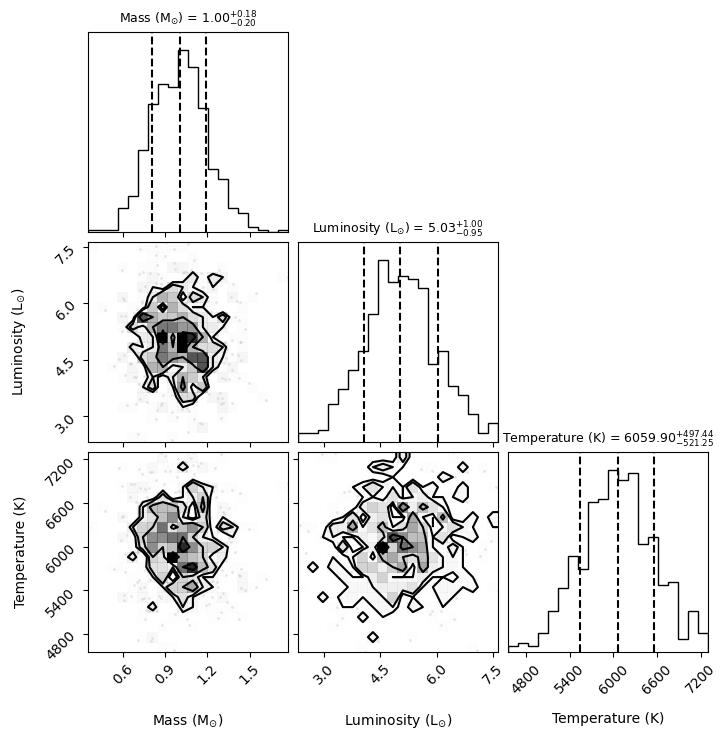

In [14]:
# Simulating stellar parameter distributions
np.random.seed(42)
num_samples = 500

# Generate synthetic data for star properties
stellar_mass = np.random.normal(loc=1.0, scale=0.2, size=num_samples)  # Solar masses
luminosity = np.random.normal(loc=5.0, scale=1.0, size=num_samples)  # Solar luminosities
temperature = np.random.normal(loc=6000, scale=500, size=num_samples)  # Kelvin

# Combine into an array
data = np.vstack([stellar_mass, luminosity, temperature]).T

# Create corner plot
figure = corner.corner(data, labels=["Mass (M$_{\odot}$)", "Luminosity (L$_{\odot}$)", "Temperature (K)"],
                       quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 9})

plt.show()

# **Conclusion**
These visualization techniques help astronomers interpret and analyze vast datasets efficiently. From simple scatter plots to complex 3D models, these tools provide insights into stellar distributions, galaxy morphology, and more. 🚀